In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from_file = __import__('2-from_file').from_file

In [ ]:
df = from_file('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv', ',')

# Remove Weighted_Price
df = df.drop(columns=['Weighted_Price'])

# Rename Timestamp → Date
df = df.rename(columns={'Timestamp': 'Date'})

# Convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Date'], unit='s')

# Index on Date
df = df.set_index('Date')

# Fill Close missing values with previous row
df['Close'] = df['Close'].fillna(method='ffill')

# Fill High, Low, Open missing values with same-row Close
for col in ['High', 'Low', 'Open']:
    df[col] = df[col].fillna(df['Close'])

# Fill Volume_(BTC) and Volume_(Currency) missing values with 0
df['Volume_(BTC)'] = df['Volume_(BTC)'].fillna(0)
df['Volume_(Currency)'] = df['Volume_(Currency)'].fillna(0)

# Keep only data from 2017 onward
df = df[df.index.year >= 2017]

# Resample daily and aggregate
df_daily = df.resample('D').agg({
    'High': 'max',
    'Low': 'min',
    'Open': 'mean',
    'Close': 'mean',
    'Volume_(BTC)': 'sum',
    'Volume_(Currency)': 'sum'
})
print(df_daily)

/tmp/ipykernel_2079/3926542632.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'] = df['Close'].fillna(method='ffill')


               High      Low         Open        Close  Volume_(BTC)  \
Date                                                                   
2017-01-01  1000.00   964.37   979.546833   979.547736   4421.502883   
2017-01-02  1034.39   990.52  1013.108889  1013.123771   7723.635752   
2017-01-03  1036.99  1006.71  1019.497944  1019.524174   8615.260058   
2017-01-04  1147.00  1018.00  1082.870194  1083.022799  16222.230267   
2017-01-05  1175.00   880.00  1056.222931  1056.177729  20446.405615   
...             ...      ...          ...          ...           ...   
2019-01-03  3893.80  3758.07  3829.991333  3829.922118   8840.254922   
2019-01-04  3849.00  3730.00  3785.379042  3785.405590   8950.110359   
2019-01-05  3874.12  3775.00  3834.627896  3834.609424   6057.934757   
2019-01-06  4088.00  3756.01  3874.269319  3874.451625   9506.268897   
2019-01-07  4070.00  3968.79  4025.103866  4025.089887   8876.737621   

            Volume_(Currency)  
Date                           

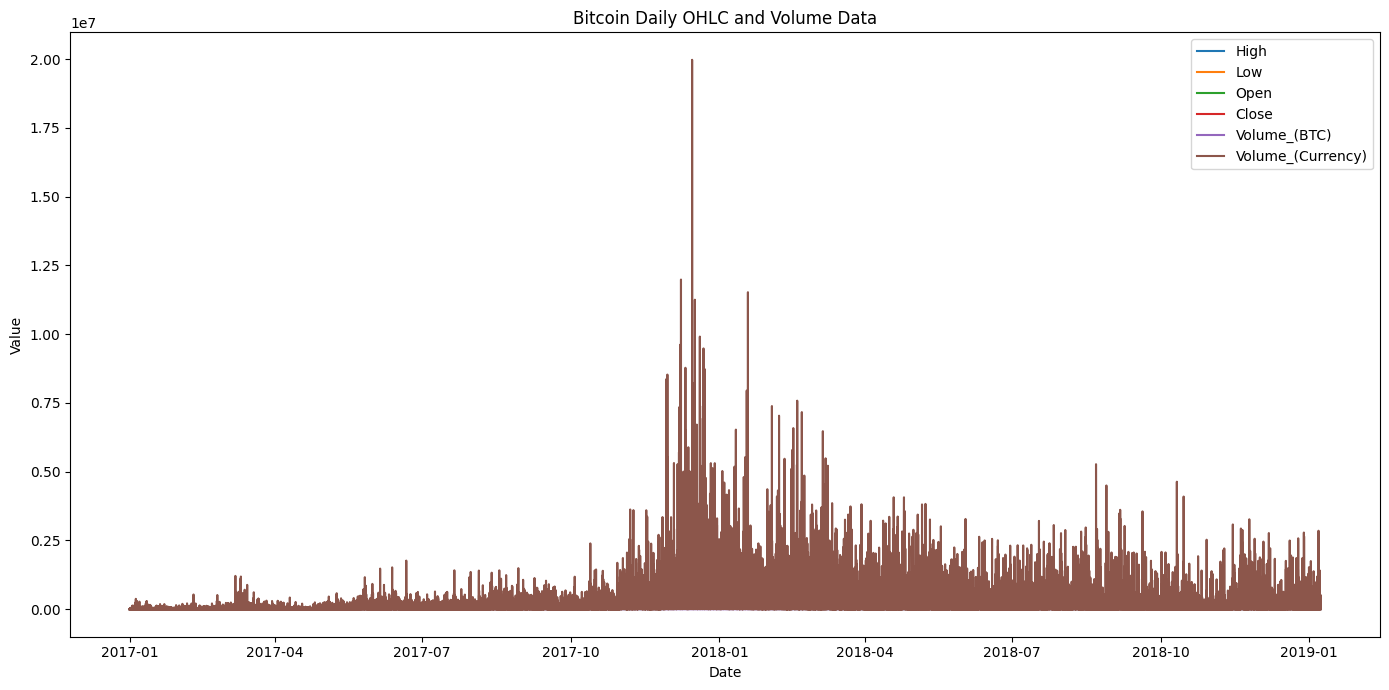

In [7]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['High'], label='High', linewidth=1.5)
plt.plot(df.index, df['Low'], label='Low', linewidth=1.5)
plt.plot(df.index, df['Open'], label='Open', linewidth=1.5)
plt.plot(df.index, df['Close'], label='Close', linewidth=1.5)
plt.plot(df.index, df['Volume_(BTC)'], label='Volume_(BTC)', linewidth=1.5)
plt.plot(df.index, df['Volume_(Currency)'], label='Volume_(Currency)', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Bitcoin Daily OHLC and Volume Data')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()